In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [136]:


import pandas as pd

# Load dataset
df = pd.read_csv("/Users/s_lokesh/Downloads/heart_disease_uci.csv")

# Convert 'sex' column to binary
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})

# Convert 'exang' and 'fbs' (True/False) to binary (1/0)
df['exang'] = df['exang'].astype(float)  # Convert True/False to 1.0/0.0, keeping NaN
df['fbs'] = df['fbs'].astype(float)  # Convert True/False to 1.0/0.0, keeping NaN

# Convert 'restecg' categorical values to numerical
df['restecg'] = df['restecg'].map({'lv hypertrophy': 2, 'st-t abnormality': 1, 'normal': 0})

# Fill missing values with mode
df['exang'].fillna(df['exang'].mode()[0], inplace=True)
df['fbs'].fillna(df['fbs'].mode()[0], inplace=True)
df['restecg'].fillna(df['restecg'].mode()[0], inplace=True)

# Final check
print(df.isnull().sum())  # Ensure no missing values
print(df.head())  # Check first few rows



# Drop non-numeric columns
non_numeric_cols = df.select_dtypes(include=['object']).columns
df = df.drop(columns=non_numeric_cols)  # Remove text-based columns

# Handle missing values (only for numeric columns)
df.fillna(df.mean(numeric_only=True), inplace=True)
y = (df['num'] > 0).astype(int).values


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs           0
restecg       0
thalch       55
exang         0
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64
   id  age  sex    dataset               cp  trestbps   chol  fbs  restecg  \
0   1   63    1  Cleveland   typical angina     145.0  233.0  1.0      2.0   
1   2   67    1  Cleveland     asymptomatic     160.0  286.0  0.0      2.0   
2   3   67    1  Cleveland     asymptomatic     120.0  229.0  0.0      2.0   
3   4   37    1  Cleveland      non-anginal     130.0  250.0  0.0      0.0   
4   5   41    0  Cleveland  atypical angina     130.0  204.0  0.0      2.0   

   thalch  exang  oldpeak        slope   ca               thal  num  
0   150.0    0.0      2.3  downsloping  0.0       fixed defect    0  
1   108.0    1.0      1.5         flat  3.0             normal    2  
2   129.0    1.0      2.6         flat  2.0  reversa

/var/folders/80/y1gglwys7zv3jfsp6qv7p9fr0000gn/T/ipykernel_2795/3198023324.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['exang'].fillna(df['exang'].mode()[0], inplace=True)
/var/folders/80/y1gglwys7zv3jfsp6qv7p9fr0000gn/T/ipykernel_2795/3198023324.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [137]:
print(df.isnull().sum())


id          0
age         0
sex         0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
ca          0
num         0
dtype: int64


In [138]:
print(df.describe())


               id         age         sex    trestbps        chol         fbs  \
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
mean   460.500000   53.510870    0.789130  132.132404  199.130337    0.150000   
std    265.725422    9.424685    0.408148   18.443895  108.957634    0.357266   
min      1.000000   28.000000    0.000000    0.000000    0.000000    0.000000   
25%    230.750000   47.000000    1.000000  120.000000  177.750000    0.000000   
50%    460.500000   54.000000    1.000000  130.000000  221.000000    0.000000   
75%    690.250000   60.000000    1.000000  140.000000  267.000000    0.000000   
max    920.000000   77.000000    1.000000  200.000000  603.000000    1.000000   

          restecg      thalch       exang     oldpeak          ca         num  
count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000  
mean     0.603261  137.545665    0.366304    0.878788    0.676375    0.995652  
std      0.805443   25.138494 

/var/folders/80/y1gglwys7zv3jfsp6qv7p9fr0000gn/T/ipykernel_2795/3557214578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="coolwarm")


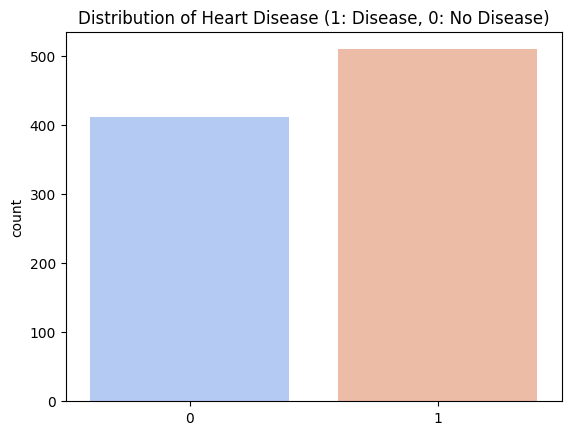

In [139]:
sns.countplot(x=y, palette="coolwarm")
plt.title("Distribution of Heart Disease (1: Disease, 0: No Disease)")
plt.show()


In [140]:
# Define Features (X) and Target (y)
X = df.drop("num", axis=1)  # Remove target column



In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [142]:
dt_model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)


In [143]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

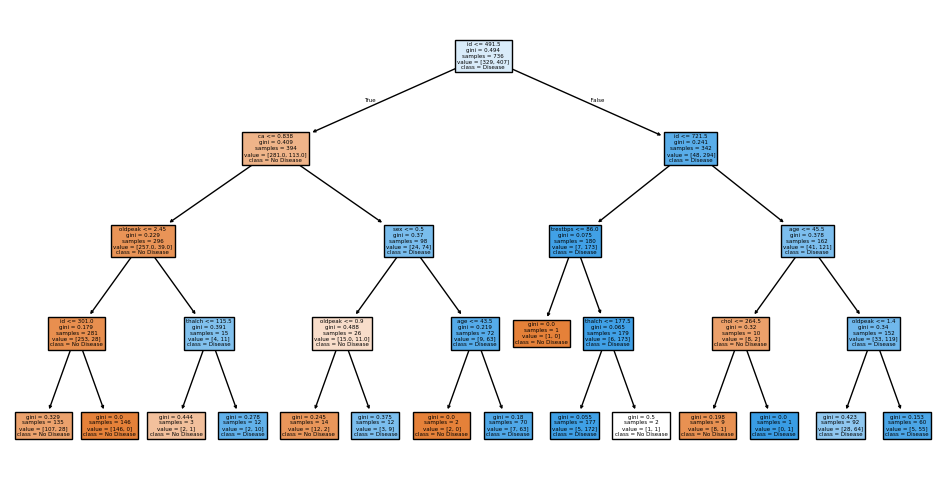

In [144]:
plt.figure(figsize=(12, 6))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.show()


In [145]:
y_pred = dt_model.predict(X_test)


In [146]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8587


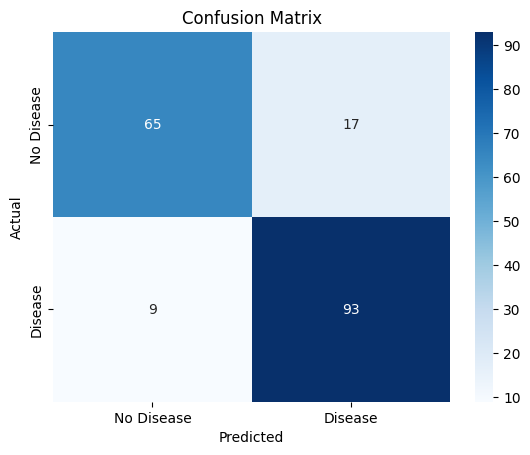

In [147]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [148]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.79      0.83        82
           1       0.85      0.91      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.86       184
weighted avg       0.86      0.86      0.86       184



In [149]:
# New patient input with correct number of features (age, trestbps, chol, thalch, oldpeak, ca)
new_patient = np.array([921, 55, 1, 140, 230, 0, 1, 150, 0, 2.5, 0])   # Adjust values as needed
new_patient = new_patient.reshape(1, -1)  # Reshape for model input

# Predict for new patient
prediction = dt_model.predict(new_patient)

# Print result
if prediction[0] == 1:
    print("Prediction: Patient is at risk of Heart Disease.")
else:
    print("Prediction: No Heart Disease detected.")


Prediction: Patient is at risk of Heart Disease.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
